# 'SousDomaine' and 'Union' partitioners

In [1]:
from trustutils import run 

run.introduction("A.Gerschenfeld / A.Bruneton","13/04/2021")
run.description("Illustration of partitioners Sous_domaine and Union")
run.TRUST_parameters("1.8.0")


## Introduction 
 Validation made by : A.Gerschenfeld / A.Bruneton



 Report created : 13/04/2021



 Report generated 27/01/2022

### Description 
Illustration of partitioners Sous_domaine and Union

### TRUST parameters 
 * Version TRUST: 1.8.0
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/Part_Ss_Dom_Union/build)

In [2]:
c1 = run.addCase("sous_dom" ,"jdd_sous_dom.data") 
c2 = run.addCase("union" ,"jdd_union.data") 
run.printCases()
run.runCases()

### Test cases 
* sous_dom/jdd_sous_dom.data : 
* union/jdd_union.data : 


Running **with Sserver**...
  => A total of 2 cases were (successfully) run in 0.2s.


## Sous_domaine
Let D be a global domain and two sub-domains D1 and D2 created from sub-zones of D. A global partition of D can be forwarded to the two sub-domains D1 and D2 in a conform fashion thanks to the 'Sous_domaine' partitioner.
### Global domain partition

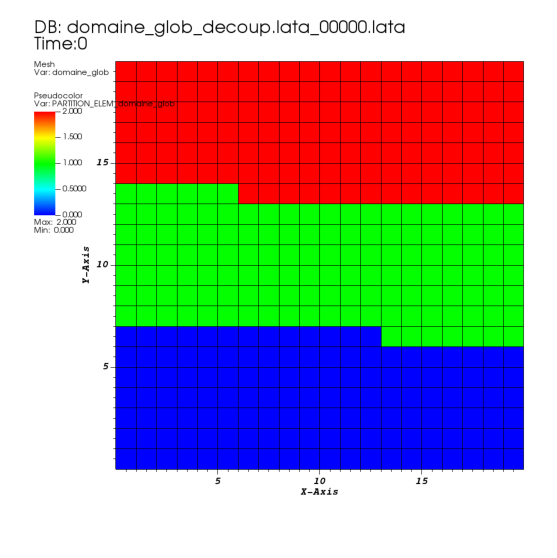

In [3]:
from trustutils import visit

visit.showField("sous_dom/domaine_glob_decoup.lata_00000.lata","Pseudocolor","PARTITION_ELEM_domaine_glob",mesh="domaine_glob")

### Sub-domain 1 and 2
The mesh is only shown for the sub-domain 1. We see the match on the allocated proc numbers with theinitial splitting of the global domain.

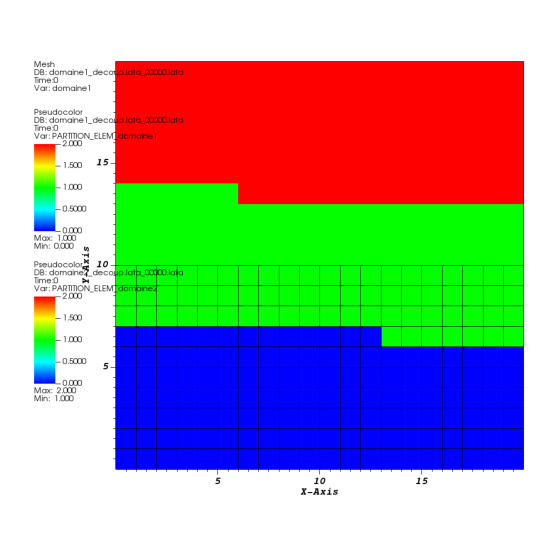

In [4]:
Graph=visit.Show("sous_dom/domaine1_decoup.lata_00000.lata","Pseudocolor","PARTITION_ELEM_domaine1",mesh="domaine1",min=0,max=2)
Graph.addField("sous_dom/domaine2_decoup.lata_00000.lata","Pseudocolor","PARTITION_ELEM_domaine2")
Graph.plot()

## Union
The other way around: from a splitting of D1 and D2 create a global partioning of D which is the unionof the D1 and D2 splitting.
### D1 partition

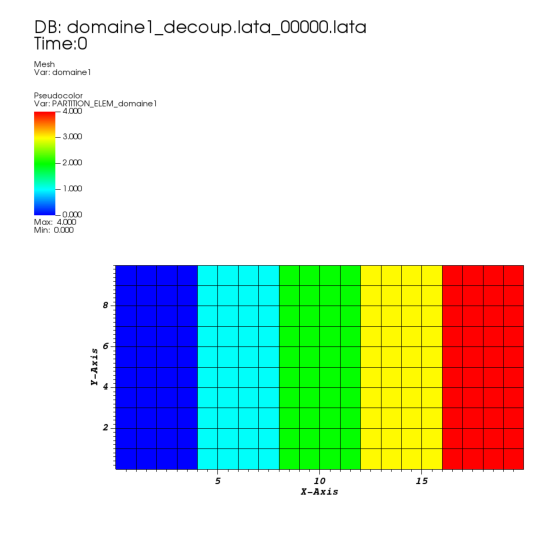

In [5]:
visit.showField("union/domaine1_decoup.lata_00000.lata","Pseudocolor","PARTITION_ELEM_domaine1",mesh="domaine1")

### D2 partition

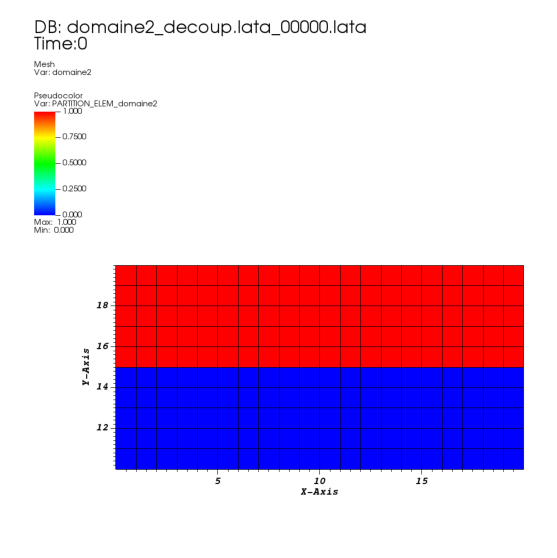

In [6]:
visit.showField("union/domaine2_decoup.lata_00000.lata","Pseudocolor","PARTITION_ELEM_domaine2",mesh="domaine2")

### Global partition

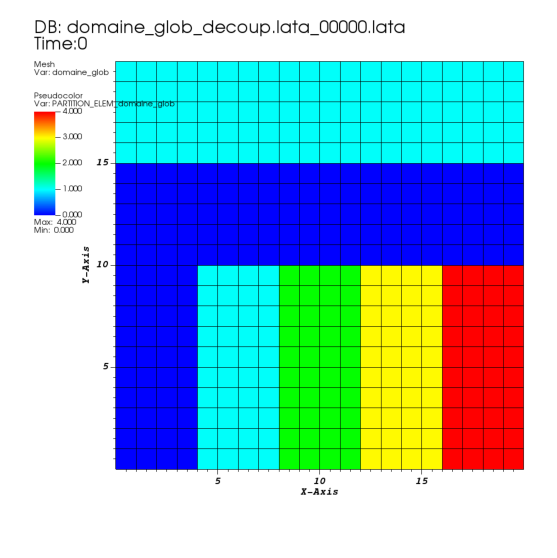

In [7]:
visit.showField("union/domaine_glob_decoup.lata_00000.lata","Pseudocolor","PARTITION_ELEM_domaine_glob",mesh="domaine_glob")

##  'Sousdomaine' data file examp

In [8]:
run.dumpDataset("sous_dom/jdd_sous_dom.data",["partitionneur","sous_domaine"])

 # Example usage of Partitionneur Sous_Domaine and Union #
 # PARALLEL NOT #
 
 dimension 2
 Pb_Conduction pb
 
 Domaine domaine_glob
 Domaine domaine1 
 Domaine domaine2
 
 Lire_med family_names_from_group_names domaine_glob domaine_glob domaine_glob.med
 Read_file domaine_glob_ssz.geo ;
 Create_domain_from_sous_zone
 {
 	 domaine_final domaine1
 	 par_sous_zone sous_zone_dom1
 	 domaine_init domaine_glob
 }
 Create_domain_from_sous_zone
 {
 	 domaine_final domaine2
 	 par_sous_zone sous_zone_dom2
 	 domaine_init domaine_glob
 }
 
 Decouper domaine_glob
 {
     partitionneur tranche { tranches 1 3 }
     ecrire_decoupage domaine_glob.txt
     ecrire_lata domaine_glob_decoup.lata
 }
 Decouper domaine1
 {
     partitionneur sous_domaine
     { 
          fichier     domaine_glob.txt
          fichier_ssz domaine_glob_sous_zone_dom1.file
     }
     Nom_Zones domaine1
     ecrire_lata domaine1_decoup.lata
 }
 Decouper domaine2
 {
     partitionneur sous_domaine
     { 
          fichier 

##   'Union' data file example

In [9]:
run.dumpDataset("union/jdd_union.data",["partitionneur","union"])

 # Example usage of Partitionneur Sous_Domaine and Union #
 # PARALLEL NOT #
 
 dimension 2
 Pb_Conduction pb
 
 Domaine domaine_glob
 Domaine domaine1 
 Domaine domaine2
 
 Lire_med family_names_from_group_names domaine_glob domaine_glob domaine_glob.med
 Read_file domaine_glob_ssz.geo ;
 Create_domain_from_sous_zone
 {
 	 domaine_final domaine1
 	 par_sous_zone sous_zone_dom1
 	 domaine_init domaine_glob
 }
 # Read domaine1_ssz.geo; #
 Create_domain_from_sous_zone
 {
 	 domaine_final domaine2
 	 par_sous_zone sous_zone_dom2
 	 domaine_init domaine_glob
 }
 # Read domaine2_ssz.geo; #
 
 Decouper domaine1
 {
     partitionneur tranche { tranches 5 1 }
     ecrire_decoupage domaine1.txt
     
     Nom_Zones domaine1
     ecrire_lata domaine1_decoup.lata
 }
 Decouper domaine2
 {
     partitionneur tranche { tranches 1 2 }
     ecrire_decoupage domaine2.txt
     
     Nom_Zones domaine2
     ecrire_lata domaine2_decoup.lata
 }
 
 Decouper domaine_glob
 {
     partitionneur union
     { 
 